## Algorithm: Decision Tree Classifier

A Decision Tree Classifier splits the data into branches based on feature values, making decisions at each node, and ultimately classifying the data into categories (e.g., "yes" or "no").

### 📈 Business Problem:
A healthcare organization wants to predict whether a patient has breast cancer based on diagnostic features like mean radius, texture, area, etc.

### 🎯 Why Decision Tree Classifier?
- Easy to interpret and visualize (decision-making flow like a real tree).
- Works well for tabular medical data with clear thresholds.
- Handles both numerical and categorical features.
- No need for feature scaling.

In [1]:
# -------------------------------
# 1. Import Required Libraries
# -------------------------------
from sklearn.datasets import load_breast_cancer  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn import tree  

In [4]:
# -------------------------------
# 2. Load Dataset
# -------------------------------
data = load_breast_cancer()
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
dataframe['target'] = data.target

In [5]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# -------------------------------
# 3. Feature Selection
# -------------------------------
X = dataframe.drop('target', axis=1)  
y = dataframe['target'] 

In [7]:
# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Size: {X_train.shape}, Test Size: {X_test.shape}")


Train Size: (455, 30), Test Size: (114, 30)


In [8]:
# -------------------------------
# 5. Initialize and Train Model
# -------------------------------
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
# -------------------------------
# 6. Make Predictions
# -------------------------------
y_pred = clf.predict(X_test)  # Predict labels for test data


In [10]:
# -------------------------------
# 7. Evaluate Model
# -------------------------------
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix:
[[40  3]
 [ 3 68]]


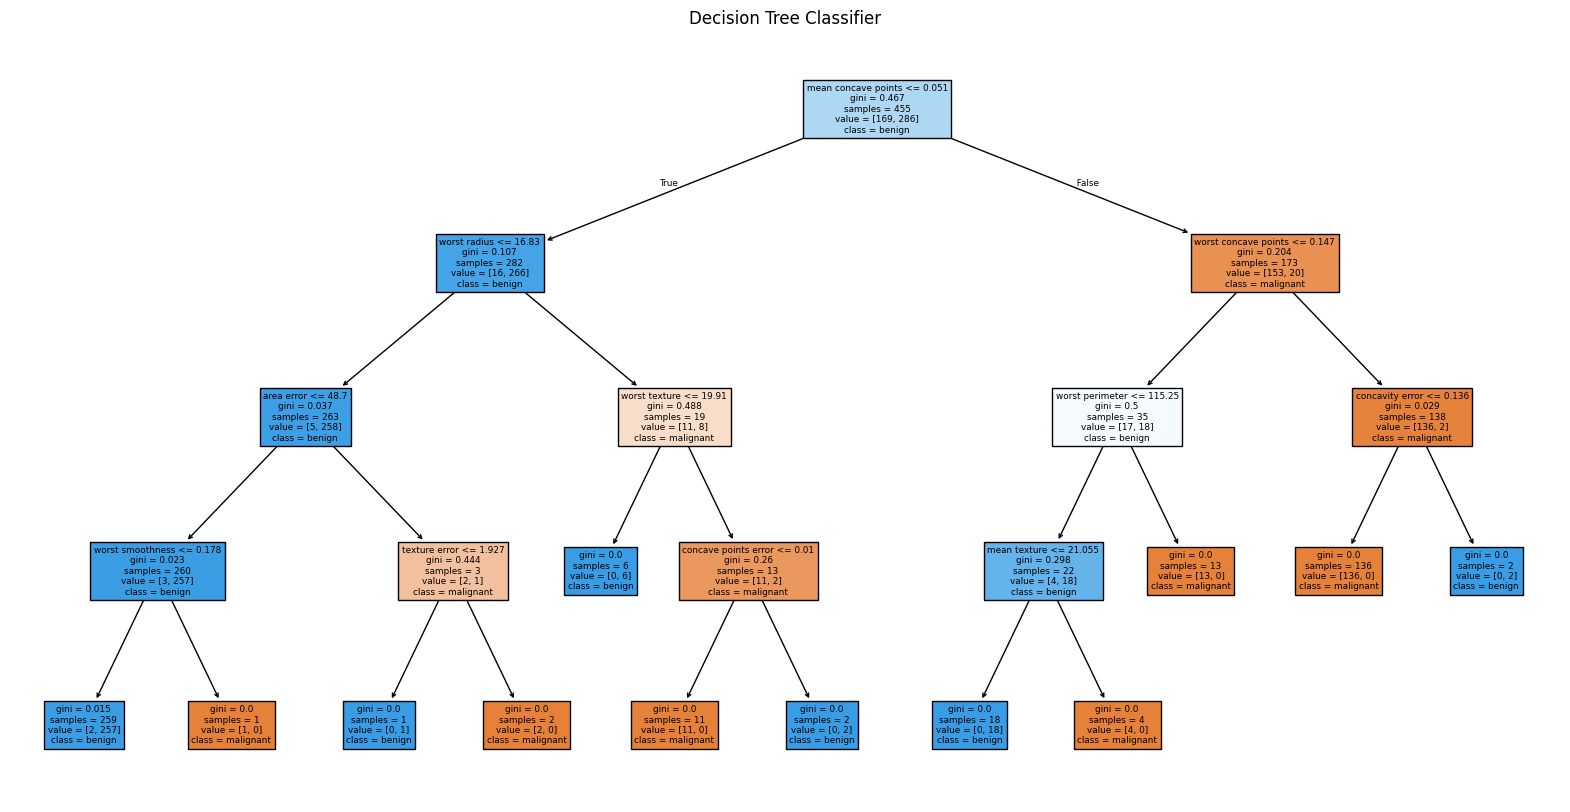

In [11]:
# -------------------------------
# 8. Visualize Decision Tree
# -------------------------------
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()


### Summary:
- Problem: Predict breast cancer diagnosis.
- Model: Decision Tree Classifier (interpretable, threshold-based).
- Result: ~95% accuracy, well-balanced precision/recall.
- Why good fit: Handles complex decision boundaries without feature scaling.
